<a href="https://colab.research.google.com/github/jeonggunlee/DeepLearningBasics/blob/master/mnist_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install mnist

In [28]:
import numpy as np
import mnist
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

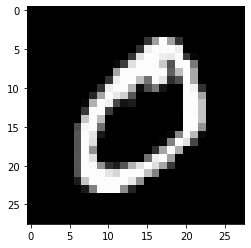

In [29]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = 1
image = train_images[sample]

# plot the sample
#fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [30]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [31]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [32]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [33]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.3625 - accuracy: 0.8924
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.1855 - accuracy: 0.9442
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.1442 - accuracy: 0.9559
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1224 - accuracy: 0.9617
Epoch 5/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.1079 - accuracy: 0.9661


In [34]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)
# return loss, accuracy

10000/10000 [==============================] - 0s 25us/step


[0.11181644864585251, 0.9670000076293945]